In [ ]:
import polars as pl

# Create an eager dataframe about fish

df_fish = pl.DataFrame({
    "fish": ["Salmon", "Trout", "Catfish", "Pike", "Sturgeon"],
    "length_cm": [70, 50, 120, 85, 200],
    "weight_kg": [5, 2, 15, 8, 20]
})

# convert to a lazyframe

lazy_fish = df_fish.lazy()


In [ ]:
# perform series of operations on lazyframe

lazy_fish_transformed = (
    lazy_fish
    .filter(pl.col("length_cm") > 80)
    .select([
        pl.col("fish"),
        pl.col("weight_kg").mean().alias("average_weight_kg")
    ])
)

In [ ]:
# explain query plan

lazy_fish_transformed.explain()

' SELECT [col("fish"), col("weight_kg").mean().alias("average_weight_kg")] FROM\n  DF ["fish", "length_cm", "weight_kg"]; PROJECT 3/3 COLUMNS; SELECTION: "[(col(\\"length_cm\\")) > (80)]"'

In [ ]:
# streaming = true

lazy_fish_transformed.explain(streaming=True)

<ipython-input-12-01cf7afd7b63>:1: UserWarning: Cannot combine 'streaming' with 'comm_subplan_elim'. CSE will be turned off.
  lazy_fish_transformed.explain(streaming=True)


' SELECT [col("fish"), col("weight_kg").mean().alias("average_weight_kg")] FROM\n  --- STREAMING\nDF ["fish", "length_cm", "weight_kg"]; PROJECT 3/3 COLUMNS; SELECTION: "[(col(\\"length_cm\\")) > (80)]"  --- END STREAMING\n\n    DF []; PROJECT */0 COLUMNS; SELECTION: "None"'

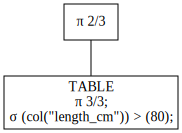

In [ ]:
# visualize the query plan as a graph

lazy_fish_transformed.show_graph()